<a href="https://colab.research.google.com/github/Technozpro/The-Sparks-Foundation-Tasks-7-Stock_Market_Prediction-/blob/main/Stock_Market_Prediction_using_Numerical_and_Textual_Analysis%5BTask_7%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Grip : The Sparks Foundation**

---

**Data Science and Business Analytics Intern**

---

**Author : Prem Gaikwad**

---

**Task 7 : Stock Market Prediction using Numerical and Textual Analysis** 

---
**Objective : Create a hybrid model for stock price/performance** 
**prediction using numerical analysis of historical stock prices, and**
**sentimental analysis of news headlines.**

**Stock to analyze and predict - SENSEX (S&P BSE SENSEX)**

**Download historical stock prices from https://finance.yahoo.com/**

**Download textual (news) data from https://bit.ly/36fFPI6**

**Loading important libraries**

In [98]:
import pandas as pd                                               #Importing data wrangling and data manipulation Libraries
import numpy as np                                                #Importing numerical and scientific computing Libraries
import matplotlib.pyplot as plt                                   #Importing data visualization and graphical plotting Libraries
import seaborn as sns                                             #used for data visualization , it is built on matplotlib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer       #Importing Machine Learning Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from textblob import TextBlob
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer                               #Importing Text Analysis Libraries
!pip install textblob 
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon') 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
!pip install twython

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Extracting SENSEX (S&P BSE SENSEX) dataset**

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Task-2/Dataset.csv')

**EDA And Data Visualization**

In [101]:
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,188070000
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,216940000
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000


In [102]:
data1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2524,2011-01-14,800.650024,807.890015,799.049988,807.570007,807.570007,4661590000
2525,2011-01-18,807.570007,807.659973,801.039978,807.559998,807.559998,5284990000
2526,2011-01-19,806.679993,807.210022,785.849976,786.890015,786.890015,4743710000
2527,2011-01-20,781.960022,785.780029,775.580017,778.080017,778.080017,4935320000
2528,2011-01-21,781.960022,786.890015,773.119995,773.179993,773.179993,4935320000


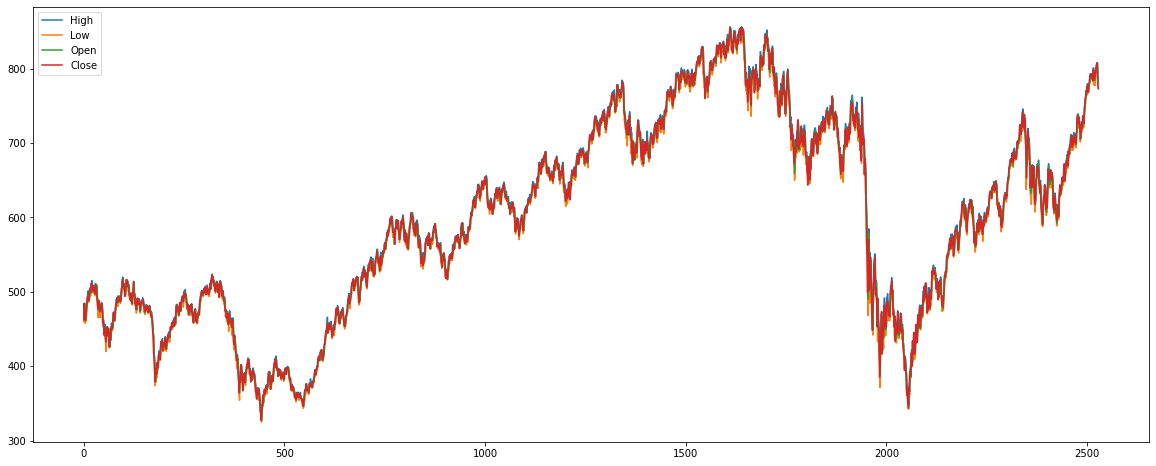

In [103]:
data1[['High','Low','Open','Close']].plot(figsize=(20,8))

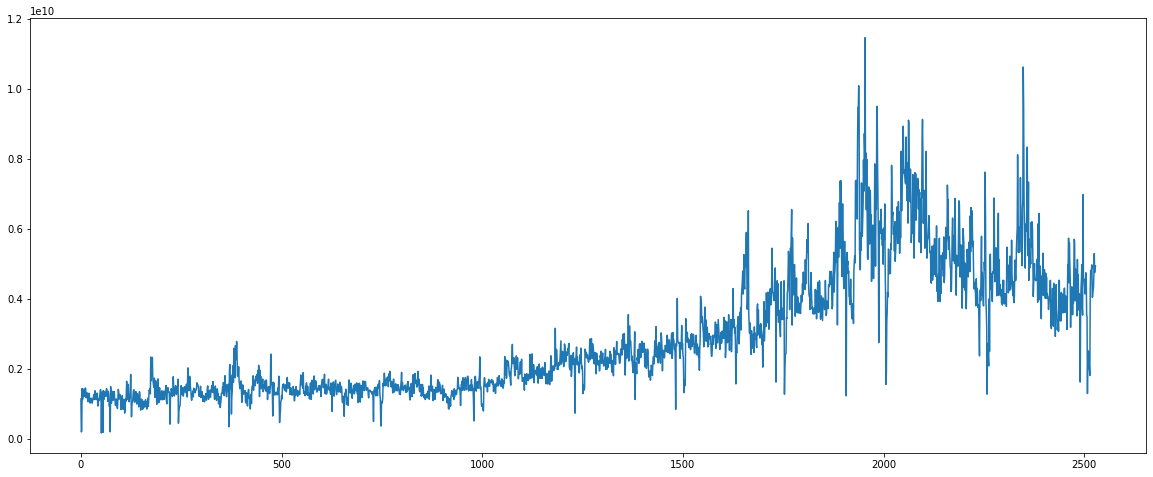

In [104]:
data1['Volume'].plot(figsize=(20,8))

**Extraction News Headline Dataset**

In [105]:
data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Task-2/india-news-headlines.csv')
data2.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [106]:
data2=data2.rename(columns={'publish_date':'Date'})
data2.head()

,Date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [107]:
data2.tail()

,Date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


In [108]:
data2['Date']=pd.to_datetime(data2['Date'],format='%Y%m%d')
data2=data2.drop('headline_category',axis=1)
data2.head(5)

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [109]:
data2=data2[data2['Date']<='2011-01-21']
data2['Date']=pd.to_datetime(data2['Date']) 
data2.head()

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [110]:
data2.tail()

,Date,headline_text
1047556,2011-01-21,Protest against Omar's remarks
1047557,2011-01-21,PAU students continue agitation
1047558,2011-01-21,Self-employment Day marked
1047559,2011-01-21,Govt school lecturers negligent: monitoring te...
1047560,2011-01-21,1;303 nominations received for Padma Awards 2011


In [111]:
data2['headline_text']=data2.groupby(['Date']).transform(lambda x: ' '.join(x))
data2=data2.drop_duplicates()
data2.reset_index()

,index,Date,headline_text
0,0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,86,2001-01-03,Powerless north India gropes in the dark Think...
2,127,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,280,2001-01-05,Light combat craft takes India into club class...
4,406,2001-01-06,Light combat craft takes India into club class...
...,...,...,...
3625,1044084,2011-01-17,Older brother in the dark about sibling's deat...
3626,1044772,2011-01-18,Top sex mistakes men make No alcohol for 6-pac...
3627,1045470,2011-01-19,My ex doesn't want me: Pratik Saali is not a g...
3628,1046166,2011-01-20,Neetu Chandra denies going panty-less! Aishwar...


In [112]:
data1=data1[data1['Date']<='2011-01-21']
data1['Date']=pd.to_datetime(data1['Date']) 
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,188070000
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,216940000
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000


In [113]:
data1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2524,2011-01-14,800.650024,807.890015,799.049988,807.570007,807.570007,4661590000
2525,2011-01-18,807.570007,807.659973,801.039978,807.559998,807.559998,5284990000
2526,2011-01-19,806.679993,807.210022,785.849976,786.890015,786.890015,4743710000
2527,2011-01-20,781.960022,785.780029,775.580017,778.080017,778.080017,4935320000
2528,2011-01-21,781.960022,786.890015,773.119995,773.179993,773.179993,4935320000


In [114]:
df2=data2.drop_duplicates()
df2.duplicated().sum()

0

## **Sentimental Analysis On News Headlines**

**Number of words in each row**

In [115]:
df2['word_count'] = df2['headline_text'].apply(lambda x: len(str(x).split(" ")))
df2[['headline_text','word_count']].head()

,headline_text,word_count
0,Status quo will not be disturbed at Ayodhya; s...,550
86,Powerless north India gropes in the dark Think...,245
127,The string that pulled Stephen Hawking to Indi...,937
280,Light combat craft takes India into club class...,823
406,Light combat craft takes India into club class...,70


**Number of Characters in each Statements from each row**

In [116]:
df2['char_count'] = df2['headline_text'].str.len()
df2[['headline_text','char_count']].head()

,headline_text,char_count
0,Status quo will not be disturbed at Ayodhya; s...,3323
86,Powerless north India gropes in the dark Think...,1441
127,The string that pulled Stephen Hawking to Indi...,5855
280,Light combat craft takes India into club class...,5011
406,Light combat craft takes India into club class...,485


**Calculating average word length**

In [117]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df2['avg_word'] = data2['headline_text'].apply(lambda x: avg_word(x))
df2[['headline_text','avg_word']].head()

,headline_text,avg_word
0,Status quo will not be disturbed at Ayodhya; s...,5.043636
86,Powerless north India gropes in the dark Think...,4.885714
127,The string that pulled Stephen Hawking to Indi...,5.249733
280,Light combat craft takes India into club class...,5.089915
406,Light combat craft takes India into club class...,5.942857


**Calculating the numbers of Stopwords**

In [118]:
stop = stopwords.words('english')
df2['stopwords'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df2[['headline_text','stopwords']].head()

,headline_text,stopwords
0,Status quo will not be disturbed at Ayodhya; s...,142
86,Powerless north India gropes in the dark Think...,56
127,The string that pulled Stephen Hawking to Indi...,191
280,Light combat craft takes India into club class...,164
406,Light combat craft takes India into club class...,7


**Number of Special Characters in each Statements**

In [119]:
df2['hastags'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df2[['headline_text','hastags']].head()

,headline_text,hastags
0,Status quo will not be disturbed at Ayodhya; s...,0
86,Powerless north India gropes in the dark Think...,0
127,The string that pulled Stephen Hawking to Indi...,0
280,Light combat craft takes India into club class...,0
406,Light combat craft takes India into club class...,0


**Number of Numerics in each Statements**

In [120]:
df2['numerics'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df2[['headline_text','numerics']].head(10)

,headline_text,numerics
0,Status quo will not be disturbed at Ayodhya; s...,6
86,Powerless north India gropes in the dark Think...,6
127,The string that pulled Stephen Hawking to Indi...,4
280,Light combat craft takes India into club class...,13
406,Light combat craft takes India into club class...,1
418,Muslim body rules out talks on Ayodhya Bajrang...,4
485,Sangh Parivar; Babri panel up the ante Frontru...,4
551,Financier Bharat Shah held for alleged links w...,12
642,Fend for yourselves; Pande tells doctors Burea...,0
646,Sonia takes on the Hindutva brigade Congress h...,5


**Number of Uppercase Words in each Headline from each row**

In [121]:
df2['upper'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df2[['headline_text','upper']].head(20)

,headline_text,upper
0,Status quo will not be disturbed at Ayodhya; s...,17
86,Powerless north India gropes in the dark Think...,6
127,The string that pulled Stephen Hawking to Indi...,34
280,Light combat craft takes India into club class...,40
406,Light combat craft takes India into club class...,1
418,Muslim body rules out talks on Ayodhya Bajrang...,24
485,Sangh Parivar; Babri panel up the ante Frontru...,14
551,Financier Bharat Shah held for alleged links w...,22
642,Fend for yourselves; Pande tells doctors Burea...,0
646,Sonia takes on the Hindutva brigade Congress h...,11


## **Pre-Process the Data**

**Converting every Words in the column to Lower Case**

In [122]:
df2['headline_text'] = df2['headline_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['headline_text'].head()

0      status quo will not be disturbed at ayodhya; s...
86     powerless north india gropes in the dark think...
127    the string that pulled stephen hawking to indi...
280    light combat craft takes india into club class...
406    light combat craft takes india into club class...
Name: headline_text, dtype: object

**Removing Punctuations**

In [123]:
df2['headline_text'] = df2['headline_text'].str.replace('[^\w\s]','')
df2['headline_text'].head()

0      status quo will not be disturbed at ayodhya sa...
86     powerless north india gropes in the dark think...
127    the string that pulled stephen hawking to indi...
280    light combat craft takes india into club class...
406    light combat craft takes india into club class...
Name: headline_text, dtype: object

**Removing the Stopwords**

In [124]:
stop = stopwords.words('english')
df2['headline_text'] = df2['headline_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df2['headline_text'].head()

0      status quo disturbed ayodhya says vajpayee fis...
86     powerless north india gropes dark think laxman...
127    string pulled stephen hawking india vajpayee g...
280    light combat craft takes india club class hawk...
406    light combat craft takes india club class hawk...
Name: headline_text, dtype: object

**Removing Common Words**

In [125]:
freq = pd.Series(' '.join(df2['headline_text']).split()).value_counts()[:10]
freq

india     28439
govt      23715
new       20015
rs        16061
city      15464
may       14980
case      14674
police    14149
us        13564
held      13463
dtype: int64

In [126]:
freq = list(freq.index)
df2['headline_text'] = df2['headline_text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in freq))
df2['headline_text'].head()

0      status quo disturbed ayodhya says vajpayee fis...
86     powerless north gropes dark think laxman tells...
127    string pulled stephen hawking vajpayee gives b...
280    light combat craft takes club class hawkings d...
406    light combat craft takes club class hawkings d...
Name: headline_text, dtype: object

**Removing Rare Words to Get Rid of Noise**

In [127]:
freq = pd.Series(' '.join(df2['headline_text']).split()).value_counts()[-10:]
freq

srksalmans         1
tirumuala          1
mpd21              1
policevillagers    1
bushbandar         1
shareautos         1
gulpers            1
1104               1
foie               1
centralisation     1
dtype: int64

In [128]:
freq = list(freq.index)
df2['headline_text'] = df2['headline_text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in freq))
df2['headline_text'].head()

0      status quo disturbed ayodhya says vajpayee fis...
86     powerless north gropes dark think laxman tells...
127    string pulled stephen hawking vajpayee gives b...
280    light combat craft takes club class hawkings d...
406    light combat craft takes club class hawkings d...
Name: headline_text, dtype: object

In [129]:
df2.shape

(3630, 9)

**Tokenization**

In [38]:
TextBlob(str(df2['headline_text'])).words

WordList(['0', 'status', 'quo', 'disturbed', 'ayodhya', 'says', 'vajpayee', 'fis', '86', 'powerless', 'north', 'gropes', 'dark', 'think', 'laxman', 'tells', '127', 'string', 'pulled', 'stephen', 'hawking', 'vajpayee', 'gives', 'b', '280', 'light', 'combat', 'craft', 'takes', 'club', 'class', 'hawkings', 'd', '406', 'light', 'combat', 'craft', 'takes', 'club', 'class', 'hawkings', 'd', '1044084', 'older', 'brother', 'dark', 'siblings', 'death', 'thought', 'supe', '1044772', 'top', 'sex', 'mistakes', 'men', 'make', 'alcohol', '6pack', 'salman', '1045470', 'ex', 'doesnt', 'want', 'pratik', 'saali', 'gaali', 'sudhir', 'tells', '1046166', 'neetu', 'chandra', 'denies', 'going', 'pantyless', 'aishwarya', '1046864', 'giving', 'kids', 'dressing', 'ak', 'hangals', 'ill', 'broke', 'dhob', 'Name', 'headline_text', 'Length', '3630', 'dtype', 'object'])

**Stemming**

In [130]:
st = PorterStemmer()
df2['headline_text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()])).head()

0      statu quo disturb ayodhya say vajpaye fissur h...
86     powerless north grope dark think laxman tell s...
127    string pull stephen hawk vajpaye give big push...
280    light combat craft take club class hawk day li...
406    light combat craft take club class hawk day ex...
Name: headline_text, dtype: object

**Perform SENTIMENTAL ANALYSIS For Each rows in a Headline_text Column**

In [131]:
df2['sentiment'] = df2['headline_text'].apply(lambda x: TextBlob(x).sentiment[0] )
df2[['headline_text','sentiment']].head()

,headline_text,sentiment
0,status quo disturbed ayodhya says vajpayee fis...,0.121014
86,powerless north gropes dark think laxman tells...,0.112500
127,string pulled stephen hawking vajpayee gives b...,0.049416
280,light combat craft takes club class hawkings d...,0.271341
406,light combat craft takes club class hawkings d...,0.262500


**Resetting Index**

In [132]:
Data1=df2[['Date','headline_text','sentiment']].reset_index()
Data1=Data1.drop('index',axis=1)

In [133]:
Data1

,Date,headline_text,sentiment
0,2001-01-02,status quo disturbed ayodhya says vajpayee fis...,0.121014
1,2001-01-03,powerless north gropes dark think laxman tells...,0.112500
2,2001-01-04,string pulled stephen hawking vajpayee gives b...,0.049416
3,2001-01-05,light combat craft takes club class hawkings d...,0.271341
4,2001-01-06,light combat craft takes club class hawkings d...,0.262500
...,...,...,...
3625,2011-01-17,older brother dark siblings death thought supe...,0.040018
3626,2011-01-18,top sex mistakes men make alcohol 6pack salman...,0.028897
3627,2011-01-19,ex doesnt want pratik saali gaali sudhir tells...,0.055350
3628,2011-01-20,neetu chandra denies going pantyless aishwarya...,0.035866


## **Analyze Our SENSEX Data**

In [134]:
Data2=data1[(data1['Date']>='2001-01-02')&(data1['Date']<='2011-01-21')]
Data2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,188070000
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,216940000
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000
...,...,...,...,...,...,...,...
2524,2011-01-14,800.650024,807.890015,799.049988,807.570007,807.570007,4661590000
2525,2011-01-18,807.570007,807.659973,801.039978,807.559998,807.559998,5284990000
2526,2011-01-19,806.679993,807.210022,785.849976,786.890015,786.890015,4743710000
2527,2011-01-20,781.960022,785.780029,775.580017,778.080017,778.080017,4935320000


In [135]:
Data2.shape

(2529, 7)

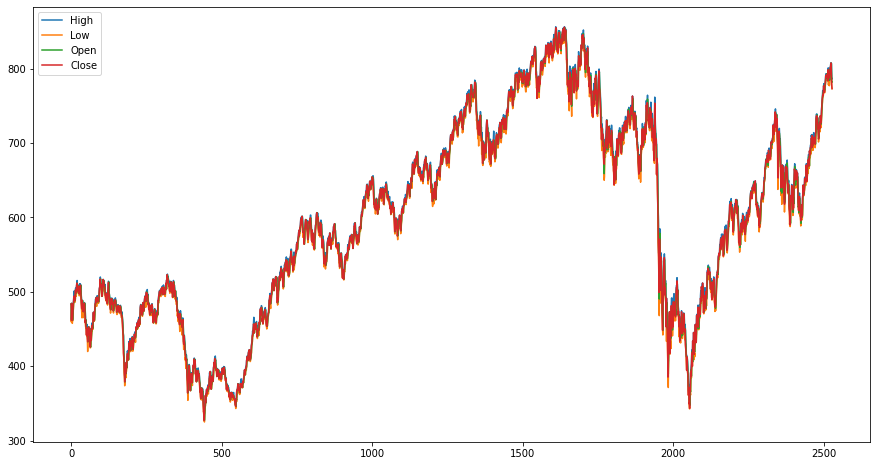

In [136]:
Data2[['High','Low','Open','Close']].plot(figsize=(15,8))

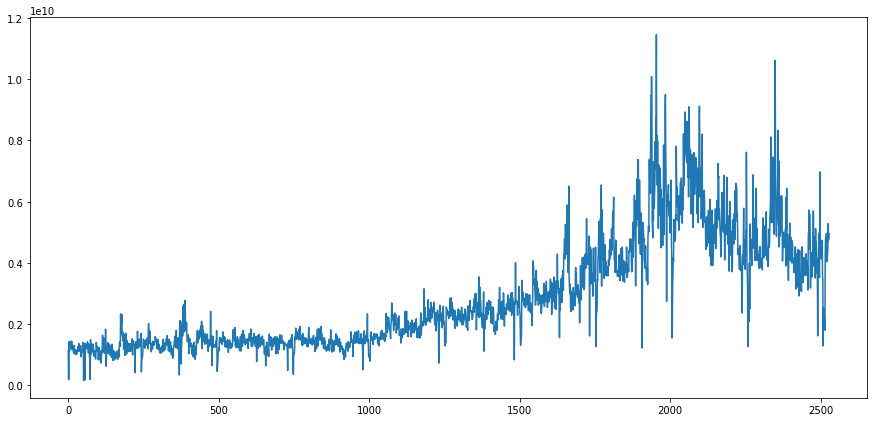

In [137]:
Data2['Volume'].plot(figsize=(15,7))

**Merging Sensex and Headlines Dataset to create a HYBRID MODEL**

In [138]:
DataTab=pd.merge(Data1,Data2,on='Date',how='right')
DataTab

,Date,headline_text,sentiment,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,status quo disturbed ayodhya says vajpayee fis...,0.121014,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000
1,2001-01-03,powerless north gropes dark think laxman tells...,0.112500,462.489990,484.390015,459.279999,484.390015,484.390015,188070000
2,2001-01-04,string pulled stephen hawking vajpayee gives b...,0.049416,484.390015,484.390015,475.899994,477.200012,477.200012,216940000
3,2001-01-05,light combat craft takes club class hawkings d...,0.271341,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000
4,2001-01-08,sangh parivar babri panel ante frontrunner key...,-0.056988,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000
...,...,...,...,...,...,...,...,...,...
2524,2011-01-14,cartoons yamla pagla deewana movie review srk ...,0.068394,800.650024,807.890015,799.049988,807.570007,807.570007,4661590000
2525,2011-01-18,top sex mistakes men make alcohol 6pack salman...,0.028897,807.570007,807.659973,801.039978,807.559998,807.559998,5284990000
2526,2011-01-19,ex doesnt want pratik saali gaali sudhir tells...,0.055350,806.679993,807.210022,785.849976,786.890015,786.890015,4743710000
2527,2011-01-20,neetu chandra denies going pantyless aishwarya...,0.035866,781.960022,785.780029,775.580017,778.080017,778.080017,4935320000


In [139]:
DataTab=DataTab.drop_duplicates()    #Removing Duplicates
DataTab.duplicated().sum()

0

In [140]:
analyzer = SentimentIntensityAnalyzer()
DataTab['scores'] = DataTab['headline_text'].apply(lambda x: analyzer.polarity_scores(str(x)))
DataTab.head()

,Date,headline_text,sentiment,Open,High,Low,Close,Adj Close,Volume,scores
0,2001-01-02,status quo disturbed ayodhya says vajpayee fis...,0.121014,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000,"{'neg': 0.17, 'neu': 0.726, 'pos': 0.105, 'com..."
1,2001-01-03,powerless north gropes dark think laxman tells...,0.112500,462.489990,484.390015,459.279999,484.390015,484.390015,188070000,"{'neg': 0.141, 'neu': 0.711, 'pos': 0.149, 'co..."
2,2001-01-04,string pulled stephen hawking vajpayee gives b...,0.049416,484.390015,484.390015,475.899994,477.200012,477.200012,216940000,"{'neg': 0.126, 'neu': 0.748, 'pos': 0.126, 'co..."
3,2001-01-05,light combat craft takes club class hawkings d...,0.271341,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000,"{'neg': 0.147, 'neu': 0.66, 'pos': 0.193, 'com..."
4,2001-01-08,sangh parivar babri panel ante frontrunner key...,-0.056988,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000,"{'neg': 0.155, 'neu': 0.753, 'pos': 0.092, 'co..."


In [141]:
DataTab['compound']=DataTab['scores'].apply(lambda score_dict: score_dict['compound']) 
DataTab['pos']=DataTab['scores'].apply(lambda score_dict: score_dict['pos'])
DataTab['neg']=DataTab['scores'].apply(lambda score_dict: score_dict['neg']) 
DataTab['neu']=DataTab['scores'].apply(lambda score_dict: score_dict['neu'])

In [142]:
DataTab=DataTab.drop('scores',axis=1)
DataTab

,Date,headline_text,sentiment,Open,High,Low,Close,Adj Close,Volume,compound,pos,neg,neu
0,2001-01-02,status quo disturbed ayodhya says vajpayee fis...,0.121014,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000,-0.9662,0.105,0.170,0.726
1,2001-01-03,powerless north gropes dark think laxman tells...,0.112500,462.489990,484.390015,459.279999,484.390015,484.390015,188070000,0.4019,0.149,0.141,0.711
2,2001-01-04,string pulled stephen hawking vajpayee gives b...,0.049416,484.390015,484.390015,475.899994,477.200012,477.200012,216940000,0.5423,0.126,0.126,0.748
3,2001-01-05,light combat craft takes club class hawkings d...,0.271341,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000,0.9841,0.193,0.147,0.660
4,2001-01-08,sangh parivar babri panel ante frontrunner key...,-0.056988,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000,-0.9709,0.092,0.155,0.753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524,2011-01-14,cartoons yamla pagla deewana movie review srk ...,0.068394,800.650024,807.890015,799.049988,807.570007,807.570007,4661590000,-0.9998,0.108,0.168,0.725
2525,2011-01-18,top sex mistakes men make alcohol 6pack salman...,0.028897,807.570007,807.659973,801.039978,807.559998,807.559998,5284990000,-0.9998,0.102,0.162,0.736
2526,2011-01-19,ex doesnt want pratik saali gaali sudhir tells...,0.055350,806.679993,807.210022,785.849976,786.890015,786.890015,4743710000,-0.9997,0.095,0.151,0.755
2527,2011-01-20,neetu chandra denies going pantyless aishwarya...,0.035866,781.960022,785.780029,775.580017,778.080017,778.080017,4935320000,-0.9998,0.107,0.164,0.728


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


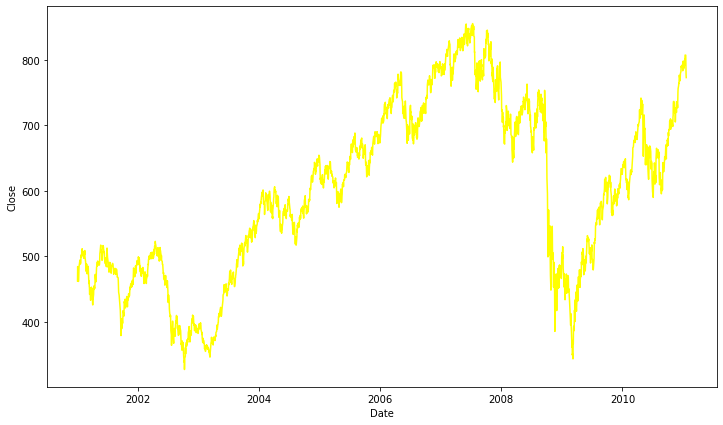

In [143]:
plt.figure(figsize=(12,7))
sns.lineplot(DataTab['Date'],DataTab['Close'],color='yellow', legend='auto')

**Creating a new Column called 'Price_up' by having logical values(0 AND 1) in it. Here 1 represents INCREASE IN STOCK while 0 represents DECREASE/REMAIN UNCHANGED**

In [144]:
DataTab['Price_up']=np.where(DataTab['Close'].shift(-1)>DataTab['Close'],1,0)
DataTab.head()

,Date,headline_text,sentiment,Open,High,Low,Close,Adj Close,Volume,compound,pos,neg,neu,Price_up
0,2001-01-02,status quo disturbed ayodhya says vajpayee fis...,0.121014,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000,-0.9662,0.105,0.170,0.726,1
1,2001-01-03,powerless north gropes dark think laxman tells...,0.112500,462.489990,484.390015,459.279999,484.390015,484.390015,188070000,0.4019,0.149,0.141,0.711,0
2,2001-01-04,string pulled stephen hawking vajpayee gives b...,0.049416,484.390015,484.390015,475.899994,477.200012,477.200012,216940000,0.5423,0.126,0.126,0.748,0
3,2001-01-05,light combat craft takes club class hawkings d...,0.271341,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000,0.9841,0.193,0.147,0.660,0
4,2001-01-08,sangh parivar babri panel ante frontrunner key...,-0.056988,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000,-0.9709,0.092,0.155,0.753,1


In [145]:
DataTab.columns

Index(['Date', 'headline_text', 'sentiment', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'compound', 'pos', 'neg', 'neu', 'Price_up'],
      dtype='object')

**Splitting Dataset into X and Y**

In [146]:
X=DataTab[['sentiment', 'Open', 'High', 'Low','Close','Volume', 'compound', 'pos', 'neg', 'neu']]
y=DataTab['Price_up']

**Splitting Dataset into train and test set**

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [148]:
print(X_train.shape)
print(X_test.shape)

(2023, 10)
(506, 10)


**Grid search for OPTIMAL PARAMETERS**

In [149]:
X_train = X_train.fillna(X_train.mean())

In [150]:
tuned_parameters=[{'max_depth':[10,20],
                   'n_estimators':[10,20],
                   'max_features':['sqrt',0.2]}]
radm_clf=RandomForestClassifier()
clf=GridSearchCV(radm_clf, tuned_parameters,cv=5,scoring='roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

**Best Score**

In [151]:
clf.best_score_

0.529515848118848

**Best Parameters**

In [152]:
clf.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 20}

**Building Final Model with Optimal Parameter Values**

In [153]:
randomclassifier=RandomForestClassifier(n_estimators=20,max_features='sqrt')
randomclassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Classification Report**

In [154]:
X_test = X_test.fillna(X_test.mean())
y_pred=randomclassifier.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.50      0.50       251
           1       0.50      0.49      0.50       255

    accuracy                           0.50       506
   macro avg       0.50      0.50      0.50       506
weighted avg       0.50      0.50      0.50       506



In [156]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5039525691699605
Mean Squared Error: 0.5039525691699605
Root Mean Squared Error: 0.7098961678794726
